# Data Cleaning

` Data cleaning is a time consuming and unenjoyable task, yet it's a very important one. Keep in mind, "garbage in, garbage out".`

#### Feeding dirty data into a model will give us results that are meaningless.

### Objective:

1. Getting the data
2. Cleaning the data
3. Organizing the data - organize the cleaned data into a way that is easy to input into other algorithms

### Output :
#### cleaned and organized data in two standard text formats:

1. Corpus - a collection of text
2. Document-Term Matrix - word counts in matrix format

## Problem Statement

Look at transcripts of various comedians and note their similarities and differences and find if the stand up comedian of your choice has comedy style different than other comedian.


## Getting The Data

You can get the transcripts of some comedian from [Scraps From The Loft](http://scrapsfromtheloft.com).

You can take help of IMDB and select only 10 or 20 comedian having highest rating.






### For example:

In [1]:
# Web scraping, pickle imports
import requests
from bs4 import BeautifulSoup
import pickle

# Scrapes transcript data from scrapsfromtheloft.com
def url_to_transcript(url):
    '''Returns transcript data specifically from scrapsfromtheloft.com.'''
    page = requests.get(url).text
    soup = BeautifulSoup(page, "lxml")
    text = [p.text for p in soup.find_all(class_="site-content",)]
    print(url)
    return text

In [2]:

# URLs of transcripts in scope
urls = ['https://scrapsfromtheloft.com/comedy/david-nihill-cultural-appreciation-transcript/',
        'https://scrapsfromtheloft.com/comedy/lewis-black-tragically-i-need-you-transcript/',
        'https://scrapsfromtheloft.com/comedy/george-carlin-im-glad-im-dead-transcript/',
        'https://scrapsfromtheloft.com/comedy/mike-birbiglia-old-man-and-pool-transcript/',
        'https://scrapsfromtheloft.com/comedy/gary-gulman-born-on-3rd-base-transcript/',
        'https://scrapsfromtheloft.com/comedy/beth-stelling-if-you-didnt-want-me-then-transcript/',
        'https://scrapsfromtheloft.com/comedy/michelle-wolf-its-great-to-be-here-transcript/',
        'https://scrapsfromtheloft.com/comedy/mark-normand-soup-to-nuts-transcript/',
        'https://scrapsfromtheloft.com/comedy/jared-freid-37-and-single-transcript/',
        'https://scrapsfromtheloft.com/comedy/tom-segura-sledgehammer-transcript/',
       ]

# Comedian names
comedians = ['david', 'lewis', 'george', 'mike', 'gary', 'beth', 'michelle', 'mark', 'jared', 'tom']

In [3]:
# # Actually request transcripts (takes a few minutes to run)
transcripts = [url_to_transcript(u) for u in urls]

https://scrapsfromtheloft.com/comedy/david-nihill-cultural-appreciation-transcript/
https://scrapsfromtheloft.com/comedy/lewis-black-tragically-i-need-you-transcript/
https://scrapsfromtheloft.com/comedy/george-carlin-im-glad-im-dead-transcript/
https://scrapsfromtheloft.com/comedy/mike-birbiglia-old-man-and-pool-transcript/
https://scrapsfromtheloft.com/comedy/gary-gulman-born-on-3rd-base-transcript/
https://scrapsfromtheloft.com/comedy/beth-stelling-if-you-didnt-want-me-then-transcript/
https://scrapsfromtheloft.com/comedy/michelle-wolf-its-great-to-be-here-transcript/
https://scrapsfromtheloft.com/comedy/mark-normand-soup-to-nuts-transcript/
https://scrapsfromtheloft.com/comedy/jared-freid-37-and-single-transcript/
https://scrapsfromtheloft.com/comedy/tom-segura-sledgehammer-transcript/


In [4]:
# # Pickle files for later use

# # Make a new directory to hold the text files
!mkdir transcripts

for i, c in enumerate(comedians):
  with open("transcripts/" + c + ".txt", "wb") as file:
      pickle.dump(transcripts[i], file)


In [5]:
# Load pickled files
data = {}
for i, c in enumerate(comedians):
    with open("transcripts/" + c + ".txt", "rb") as file:
        data[c] = pickle.load(file)

In [6]:
# Double check to make sure data has been loaded properly
data.keys()

dict_keys(['david', 'lewis', 'george', 'mike', 'gary', 'beth', 'michelle', 'mark', 'jared', 'tom'])

In [7]:
# More checks
data['david'][:2]

['\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nCOMEDY \n\n\n\n\n\n\n\nDavid  Nihill: Cultural Appreciation (2023) | Transcript \n\n\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\tJanuary 15, 2024\t\t\t\t\t\n\n\n\n\n\n\n\n\t\t\tIrish comedian David Nihill humorously explores identity, immigration, and Irish-Latino parallels, blending personal anecdotes with history\t\t\n\n\n\n \n\n\n\nIn this 2023 comedy special, David Nihill humorously navigates the complexities of identity, cultural norms, and immigration. The routine starts with an amusing encounter at an immigration checkpoint, highlighting Nihill’s Irish heritage and the officer’s misplaced connection to it. Nihill then adopts a Latino identity as a comedic device to critique automated customer service systems. He cleverly connects Irish and Latino cultures, drawing parallels in their experiences, particularly around issues like immigration and religion, using humor to highlight these similarities.\nNihill also addresses the evolving perception of Irish immigran

## Cleaning The Data

When dealing with numerical data, data cleaning often involves removing null values and duplicate data, dealing with outliers, etc. With text data, there are some common data cleaning techniques, which are also known as text pre-processing techniques.

With text data, this cleaning process can go on forever. There's always an exception to every cleaning step. So, we're going to follow the MVP (minimum viable product) approach - start simple and iterate.
### Assignment:
1. Perform the following data cleaning on transcripts:
i) Make text all lower case
ii) Remove punctuation
iii) Remove numerical values
iv) Remove common non-sensical text (/n)
v) Tokenize text
vi) Remove stop words

In [8]:
# Let's take a look at our data again
next(iter(data.keys()))

'david'

In [9]:
# Notice that our dictionary is currently in key: comedian, value: list of text format
next(iter(data.values()))

['\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nCOMEDY \n\n\n\n\n\n\n\nDavid  Nihill: Cultural Appreciation (2023) | Transcript \n\n\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\tJanuary 15, 2024\t\t\t\t\t\n\n\n\n\n\n\n\n\t\t\tIrish comedian David Nihill humorously explores identity, immigration, and Irish-Latino parallels, blending personal anecdotes with history\t\t\n\n\n\n \n\n\n\nIn this 2023 comedy special, David Nihill humorously navigates the complexities of identity, cultural norms, and immigration. The routine starts with an amusing encounter at an immigration checkpoint, highlighting Nihill’s Irish heritage and the officer’s misplaced connection to it. Nihill then adopts a Latino identity as a comedic device to critique automated customer service systems. He cleverly connects Irish and Latino cultures, drawing parallels in their experiences, particularly around issues like immigration and religion, using humor to highlight these similarities.\nNihill also addresses the evolving perception of Irish immigran

In [10]:
# We are going to change this to key: comedian, value: string format
def combine_text(list_of_text):
    '''Takes a list of text and combines them into one large chunk of text.'''
    combined_text = ' '.join(list_of_text)
    return combined_text

In [11]:
# Combine it!
data_combined = {key: [combine_text(value)] for (key, value) in data.items()}

In [12]:
# We can either keep it in dictionary format or put it into a pandas dataframe
import pandas as pd
pd.set_option('max_colwidth',150)

data_df = pd.DataFrame.from_dict(data_combined).transpose()
data_df.columns = ['transcript']
data_df = data_df.sort_index()
data_df

transcript
beth      \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nCOMEDY \n\n\n\n\n\n\n\nBeth Stelling: If You Didn’t Want Me Then (2023) | Transcript \n\n\n\n\n\n\n\n\t\t\t\t\t\t\t\...
david     \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nCOMEDY \n\n\n\n\n\n\n\nDavid  Nihill: Cultural Appreciation (2023) | Transcript \n\n\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\t...
gary      \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nCOMEDY \n\n\n\n\n\n\n\nGary Gulman: Born on 3rd Base (2023 | Transcript \n\n\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\tDecember...
george    \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nCOMEDY \n\n\n\n\n\n\n\nGeorge Carlin: I’m Glad I’m Dead (2024) | Transcript \n\n\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\tJanu...
jared     \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nCOMEDY \n\n\n\n\n\n\n\nJared Freid: 37 and Single (2023) | Transcript \n\n\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\tSeptember ...
lewis     \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nCOMEDY \n\n\n\n\n\n\n\nLewis Black: Tragically, I Need You (2023) | Transcript \n\n\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\tJ...
mark      \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nCOMEDY \n\n\n\n\n\n\n\nMark Normand: Soup to Nuts (2023) | Transcript \n\n\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\tSeptember ...
michelle  \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nCOMEDY \n\n\n\n\n\n\n\nMichelle Wolf: It’s Great to Be Here (2023) | Transcript \n\n\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\t...
mike      \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nCOMEDY \n\n\n\n\n\n\n\nMike Birbiglia: The Old Man and the Pool (2023) | Transcript \n\n\n\n\n\n\n\n\t\t\t\t\t\t\t\t...
tom       \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nCOMEDY \n\n\n\n\n\n\n\nTom Segura: Sledgehammer (2023) | Transcript \n\n\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\tJuly 10, 202...

In [13]:
# Let's take a look at the transcript for Ali Wong
data_df.transcript.loc['jared']

"\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nCOMEDY \n\n\n\n\n\n\n\nJared Freid: 37 and Single (2023) | Transcript \n\n\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\tSeptember 22, 2023\t\t\t\t\t\n\n\n\n\n\n\n\n\t\t\tComedian Jared Freid sounds off on the highs and lows of being single at 37, from dating app frustrations to awkward setups to breakup justifications.\t\t\n\n\n\n \n\n\n\n[CROWD CHEERING, APPLAUDING]\nI’m 37 and single.\n[CROWD CHEERING, LAUGHING]\nIt’s a bad combination. I’ve gotten pickier. I don’t know how that happened. I’ve gotten pickier. I was on a dating app, said no to someone’s name the other day.\n[CROWD CHUCKLING]\nA name. I saw a name. I was like, “Fuck that name.”\n[CROWD LAUGHING]\nIt was Darlene.\n[CROWD LAUGHING]\nI’m not dating a Darlene. I’m not dating a Darlene. I’m not a husband from the 1950s. I’m not… dating the Werther’s Originals of names.\n[CROWD LAUGHING]\nI’m not dating a Sophia, a Blanche, a Rose, a Dorothy. If your name was on Nick at Nite, I’m not dating you.\n[CROWD LAUG

In [14]:
# Apply a first round of text cleaning techniques
import re
import string

def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

round1 = lambda x: clean_text_round1(x)

In [15]:
# Let's take a look at the updated text
data_clean = pd.DataFrame(data_df.transcript.apply(round1))
data_clean

transcript
beth      \n\n\n\n\n\n\n\n\n\n\n\n\n\n\ncomedy \n\n\n\n\n\n\n\nbeth stelling if you didn’t want me then   transcript \n\n\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\tnov...
david     \n\n\n\n\n\n\n\n\n\n\n\n\n\n\ncomedy \n\n\n\n\n\n\n\ndavid  nihill cultural appreciation   transcript \n\n\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\tjanuary ...
gary      \n\n\n\n\n\n\n\n\n\n\n\n\n\n\ncomedy \n\n\n\n\n\n\n\ngary gulman born on  base   transcript \n\n\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\tdecember  \t\t\t\t...
george    \n\n\n\n\n\n\n\n\n\n\n\n\n\n\ncomedy \n\n\n\n\n\n\n\ngeorge carlin i’m glad i’m dead   transcript \n\n\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\tjanuary  \t\...
jared     \n\n\n\n\n\n\n\n\n\n\n\n\n\n\ncomedy \n\n\n\n\n\n\n\njared freid  and single   transcript \n\n\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\tseptember  \t\t\t\t\...
lewis     \n\n\n\n\n\n\n\n\n\n\n\n\n\n\ncomedy \n\n\n\n\n\n\n\nlewis black tragically i need you   transcript \n\n\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\tjanuary  \...
mark      \n\n\n\n\n\n\n\n\n\n\n\n\n\n\ncomedy \n\n\n\n\n\n\n\nmark normand soup to nuts   transcript \n\n\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\tseptember  \t\t\t\...
michelle  \n\n\n\n\n\n\n\n\n\n\n\n\n\n\ncomedy \n\n\n\n\n\n\n\nmichelle wolf it’s great to be here   transcript \n\n\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\toctober ...
mike      \n\n\n\n\n\n\n\n\n\n\n\n\n\n\ncomedy \n\n\n\n\n\n\n\nmike birbiglia the old man and the pool   transcript \n\n\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\tnove...
tom       \n\n\n\n\n\n\n\n\n\n\n\n\n\n\ncomedy \n\n\n\n\n\n\n\ntom segura sledgehammer   transcript \n\n\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\tjuly  \t\t\t\t\t\n\n...

In [16]:
# Apply a second round of cleaning
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

round2 = lambda x: clean_text_round2(x)

In [17]:
# Let's take a look at the updated text
data_clean = pd.DataFrame(data_clean.transcript.apply(round2))
data_clean

transcript
beth      comedy beth stelling if you didnt want me then   transcript \t\t\t\t\t\t\t\t\t\tnovember  \t\t\t\t\t\t\t\tcomedian beth stelling is aging in dog y...
david     comedy david  nihill cultural appreciation   transcript \t\t\t\t\t\t\t\t\t\tjanuary  \t\t\t\t\t\t\t\tirish comedian david nihill humorously explor...
gary      comedy gary gulman born on  base   transcript \t\t\t\t\t\t\t\t\t\tdecember  \t\t\t\t\t\t\t\tborn on  base is gary gulmans humorously poignant expl...
george    comedy george carlin im glad im dead   transcript \t\t\t\t\t\t\t\t\t\tjanuary  \t\t\t\t\t\t\t\tgeorge carlin im glad im dead is a standup comedy s...
jared     comedy jared freid  and single   transcript \t\t\t\t\t\t\t\t\t\tseptember  \t\t\t\t\t\t\t\tcomedian jared freid sounds off on the highs and lows o...
lewis     comedy lewis black tragically i need you   transcript \t\t\t\t\t\t\t\t\t\tjanuary  \t\t\t\t\t\t\t\tlewis black discusses pandemic life vaccine ske...
mark      comedy mark normand soup to nuts   transcript \t\t\t\t\t\t\t\t\t\tseptember  \t\t\t\t\t\t\t\tfrom awkward lap dances to the intimacy of letting on...
michelle  comedy michelle wolf its great to be here   transcript \t\t\t\t\t\t\t\t\t\toctober  \t\t\t\t\t\t\t\tcomedian michelle wolf wryly riffs on nude bea...
mike      comedy mike birbiglia the old man and the pool   transcript \t\t\t\t\t\t\t\t\t\tnovember  \t\t\t\t\t\t\t\tmike birbiglias oneman show the old man ...
tom       comedy tom segura sledgehammer   transcript \t\t\t\t\t\t\t\t\t\tjuly  \t\t\t\t\t\t\t\tfrom his dads unusual deathbed confession to watching his mo...

## Organizing The Data

### Assignment:
1. Organized data in two standard text formats:
   a) Corpus - corpus is a collection of texts, and they are all put together neatly in a pandas dataframe here.
   b) Document-Term Matrix - word counts in matrix format

### Corpus: Example

A corpus is a collection of texts, and they are all put together neatly in a pandas dataframe here.

In [18]:
# Let's take a look at our dataframe
data_df

transcript
beth      \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nCOMEDY \n\n\n\n\n\n\n\nBeth Stelling: If You Didn’t Want Me Then (2023) | Transcript \n\n\n\n\n\n\n\n\t\t\t\t\t\t\t\...
david     \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nCOMEDY \n\n\n\n\n\n\n\nDavid  Nihill: Cultural Appreciation (2023) | Transcript \n\n\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\t...
gary      \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nCOMEDY \n\n\n\n\n\n\n\nGary Gulman: Born on 3rd Base (2023 | Transcript \n\n\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\tDecember...
george    \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nCOMEDY \n\n\n\n\n\n\n\nGeorge Carlin: I’m Glad I’m Dead (2024) | Transcript \n\n\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\tJanu...
jared     \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nCOMEDY \n\n\n\n\n\n\n\nJared Freid: 37 and Single (2023) | Transcript \n\n\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\tSeptember ...
lewis     \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nCOMEDY \n\n\n\n\n\n\n\nLewis Black: Tragically, I Need You (2023) | Transcript \n\n\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\tJ...
mark      \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nCOMEDY \n\n\n\n\n\n\n\nMark Normand: Soup to Nuts (2023) | Transcript \n\n\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\tSeptember ...
michelle  \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nCOMEDY \n\n\n\n\n\n\n\nMichelle Wolf: It’s Great to Be Here (2023) | Transcript \n\n\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\t...
mike      \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nCOMEDY \n\n\n\n\n\n\n\nMike Birbiglia: The Old Man and the Pool (2023) | Transcript \n\n\n\n\n\n\n\n\t\t\t\t\t\t\t\t...
tom       \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nCOMEDY \n\n\n\n\n\n\n\nTom Segura: Sledgehammer (2023) | Transcript \n\n\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\tJuly 10, 202...

In [19]:
# Let's add the comedians' full names as well
full_names = ['David Nihill', 'Lewis Black', 'George Carlin', 'Mike Birbiglia', 'Gary Gulman', 'Beth Stelling', 'Michelle Wolf', 'Mark Normand', 'Jared Fried', 'Tom Segura']

data_df['full_name'] = full_names
data_df

transcript  \
beth      \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nCOMEDY \n\n\n\n\n\n\n\nBeth Stelling: If You Didn’t Want Me Then (2023) | Transcript \n\n\n\n\n\n\n\n\t\t\t\t\t\t\t\...   
david     \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nCOMEDY \n\n\n\n\n\n\n\nDavid  Nihill: Cultural Appreciation (2023) | Transcript \n\n\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\t...   
gary      \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nCOMEDY \n\n\n\n\n\n\n\nGary Gulman: Born on 3rd Base (2023 | Transcript \n\n\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\tDecember...   
george    \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nCOMEDY \n\n\n\n\n\n\n\nGeorge Carlin: I’m Glad I’m Dead (2024) | Transcript \n\n\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\tJanu...   
jared     \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nCOMEDY \n\n\n\n\n\n\n\nJared Freid: 37 and Single (2023) | Transcript \n\n\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\tSeptember ...   
lewis     \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nCOMEDY \n\n\n\n\n\n\n\nLewis Black: Tragically, I Need You (2023) | Transcript \n\n\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\tJ...   
mark      \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nCOMEDY \n\n\n\n\n\n\n\nMark Normand: Soup to Nuts (2023) | Transcript \n\n\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\tSeptember ...   
michelle  \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nCOMEDY \n\n\n\n\n\n\n\nMichelle Wolf: It’s Great to Be Here (2023) | Transcript \n\n\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\t...   
mike      \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nCOMEDY \n\n\n\n\n\n\n\nMike Birbiglia: The Old Man and the Pool (2023) | Transcript \n\n\n\n\n\n\n\n\t\t\t\t\t\t\t\t...   
tom       \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nCOMEDY \n\n\n\n\n\n\n\nTom Segura: Sledgehammer (2023) | Transcript \n\n\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\tJuly 10, 202...   

               full_name  
beth        David Nihill  
david        Lewis Black  
gary       George Carlin  
george    Mike Birbiglia  
jared        Gary Gulman  
lewis      Beth Stelling  
mark       Michelle Wolf  
michelle    Mark Normand  
mike         Jared Fried  
tom           Tom Segura

In [20]:
# Let's pickle it for later use
data_df.to_pickle("corpus.pkl")

### Document-Term Matrix: Example

For many of the techniques we'll be using in future assignment, the text must be tokenized, meaning broken down into smaller pieces. The most common tokenization technique is to break down text into words. We can do this using scikit-learn's ` CountVectorizer `, where every row will represent a different document and every column will represent a different word.

In addition, with ` CountVectorizer `, we can remove stop words. Stop words are common words that add no additional meaning to text such as 'a', 'the', etc.

In [21]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(data_clean.transcript)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())
data_dtm.index = data_clean.index
data_dtm

aa  aback  abacus  abdominal  abide  abilitiesand  ability  able  \
beth       0      0       0          1      0             0        0     3   
david      0      0       0          0      0             0        0     0   
gary       2      0       0          0      1             0        0     1   
george     0      0       0          0      0             0        1     3   
jared      1      0       0          0      0             0        0     0   
lewis      0      0       0          0      0             0        0     1   
mark       0      0       0          0      0             0        0     1   
michelle   0      1       0          0      0             1        1     5   
mike       1      0       1          0      0             0        1     1   
tom        0      0       0          0      0             0        0     1   

          abnormal  abolitionist  ...  zip  zippers  ziti  zombie  zoo  zoom  \
beth             0             0  ...    0        1     0       0    0     0   
david            0             1  ...    0        0     0       0    0     0   
gary             0             0  ...    0        0     0       0    0     0   
george           0             0  ...    0        0     0       0    0     0   
jared            0             0  ...    0        0     0       1    0     0   
lewis            4             0  ...    0        0     0       0    0     0   
mark             0             0  ...    0        0     0       0    0     0   
michelle         0             0  ...    1        0     0       0    0     0   
mike             0             0  ...    0        0     1       0    0     1   
tom              0             0  ...    0        0     0       0    1     0   

          zorro  zs  zuck  zuckerbergs  
beth          0   0     0            0  
david         3   0     0            0  
gary          0   0     0            0  
george        0   0     1            1  
jared         0   0     0            0  
lewis         0   0     0            0  
mark          0   0     0            0  
michelle      0   0     0            0  
mike          0   1     0            0  
tom           0   0     0            0  

[10 rows x 9373 columns]

In [22]:
# Let's pickle it for later use
data_dtm.to_pickle("dtm.pkl")

In [23]:
# Let's also pickle the cleaned data (before we put it in document-term matrix format) and the CountVectorizer object
data_clean.to_pickle('data_clean.pkl')
pickle.dump(cv, open("cv.pkl", "wb"))

## Additional Assignments:

1. Can you add an additional regular expression to the clean_text_round2 function to further clean the text?
2. Play around with CountVectorizer's parameters. What is ngram_range? What is min_df and max_df?

In [24]:
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    text = re.sub(r'\b(?:haha|hehe|hoho)\b', '', text, flags=re.IGNORECASE)  # Remove laughter mentions
    text = re.sub(r'\b\d+\b', '', text)  # Remove numbers
    text = re.sub('[^a-zA-Z\s]', '', text)  # Remove special characters
    return text

round2 = lambda x: clean_text_round2(x)
data_clean = pd.DataFrame(data_clean.transcript.apply(round2))


In [25]:
from sklearn.feature_extraction.text import CountVectorizer

# Define parameters for CountVectorizer
ngram_range = (1, 2)  # Unigrams and bigrams
min_df = 5  # Minimum document frequency for a term to be included
max_df = 0.6  # Maximum document frequency for a term to be included

# Create a custom CountVectorizer
custom_cv = CountVectorizer(ngram_range=ngram_range, min_df=min_df, max_df=max_df)

# Fit and transform the text data using the custom CountVectorizer
data_cv_custom = custom_cv.fit_transform(data_clean.transcript)

# Create a DataFrame with the document-term matrix (DTM)
data_dtm_custom = pd.DataFrame(data_cv_custom.toarray(), columns=custom_cv.get_feature_names_out())
data_dtm_custom.index = data_clean.index

# Display the resulting document-term matrix
data_dtm_custom


about how  about my  about to  about you  above  absolutely  \
beth              0         2         0          0      0           2   
david             0         0         0          0      1           1   
gary              0         0         0          0      0           0   
george            4         1         2          2      1           2   
jared             0         2         1          2      2           0   
lewis             1         0         0          1      0           0   
mark              1         1         1          1      0           0   
michelle          7         2         1          3      1           1   
mike              1         3         2          1      0           0   
tom               0         0         2          0      1           1   

          across the  act  actual  again and  ...  you that  you went  \
beth               1    1       0          0  ...         1         1   
david              1    0       1          2  ...         1         1   
gary               0    0       0          2  ...         0         0   
george             1    2       1          0  ...         1         0   
jared              0    2       0          0  ...         0         1   
lewis              0    0       1          0  ...         3         1   
mark               0    0       1          0  ...         2         0   
michelle           1    1       1          1  ...         1         0   
mike               0    2       0          1  ...         0         1   
tom                1    0       0          1  ...         0         0   

          your mouth  your own  youre in  youre just  youre on  youve been  \
beth               0         0         0           1         0           1   
david              0         2         1           3         0           0   
gary               1         0         0           1         0           0   
george             0         1         2           0         1           1   
jared              1         0         0           2         1           1   
lewis              1         0         0           1         1           0   
mark               0         2         1           0         1           0   
michelle           1         2         1           0         0           2   
mike               0         4         1           0         0           2   
tom                1         0         1           1         1           0   

          youve ever  zero  
beth               1     0  
david              4     0  
gary               0     2  
george             1     1  
jared              1     1  
lewis              0     0  
mark               0     1  
michelle           0     0  
mike               0     2  
tom                2     1  

[10 rows x 964 columns]

# Exploratory Data Analysis

## Introduction

After the data cleaning step where we put our data into a few standard formats, the next step is to take a look at the data and see if what we're looking at makes sense. Before applying any fancy algorithms, it's always important to explore the data first.

When working with numerical data, some of the exploratory data analysis (EDA) techniques we can use include finding the average of the data set, the distribution of the data, the most common values, etc. The idea is the same when working with text data. We are going to find some more obvious patterns with EDA before identifying the hidden patterns with machines learning (ML) techniques. We are going to look at the following for each comedian:

1. **Most common words** - find these and create word clouds
2. **Size of vocabulary** - look number of unique words and also how quickly someone speaks
3. **Amount of profanity** - most common terms

## Most Common Words

### Analysis


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


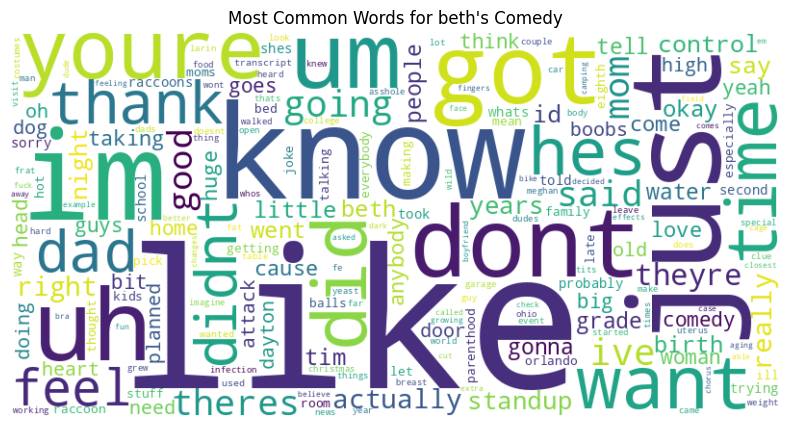

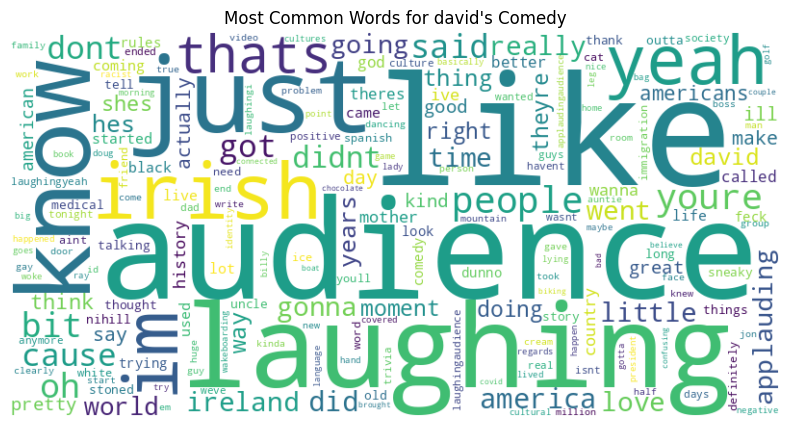

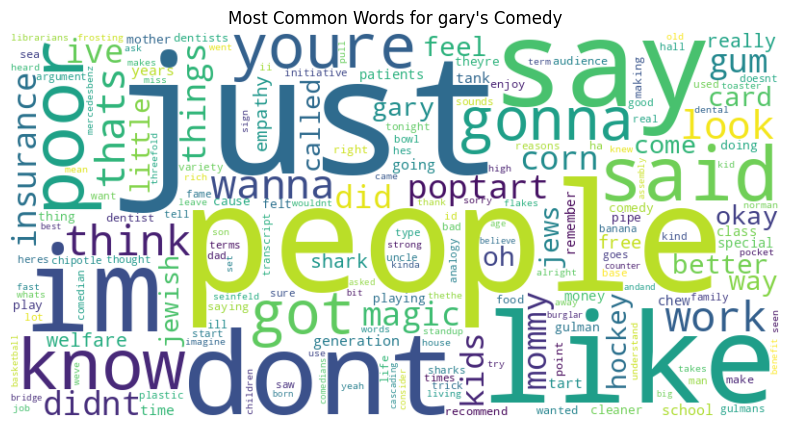

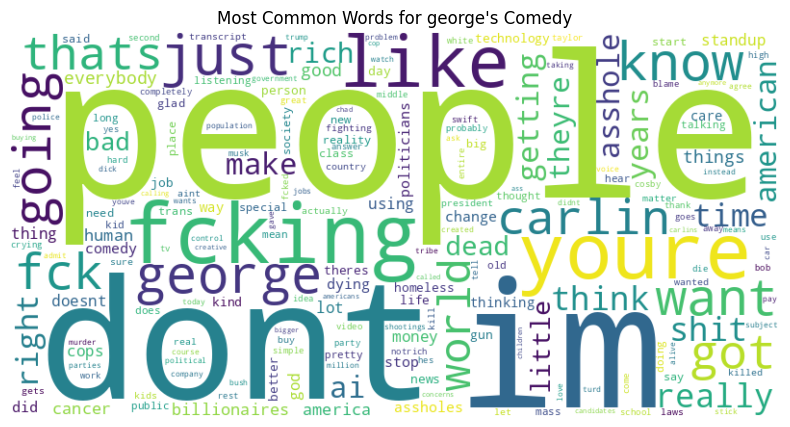

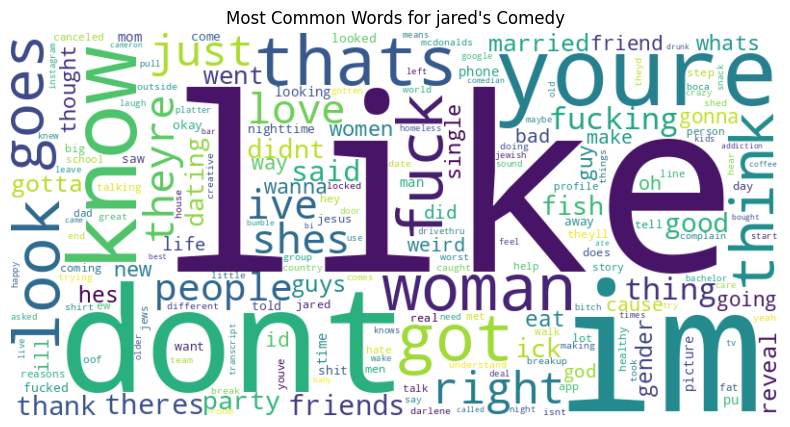

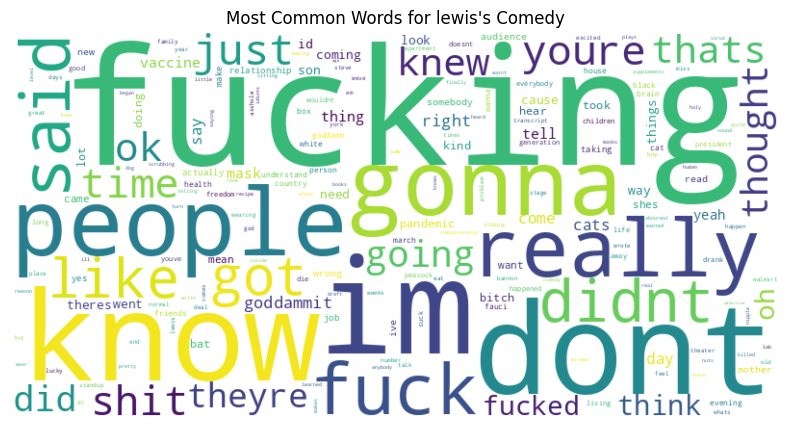

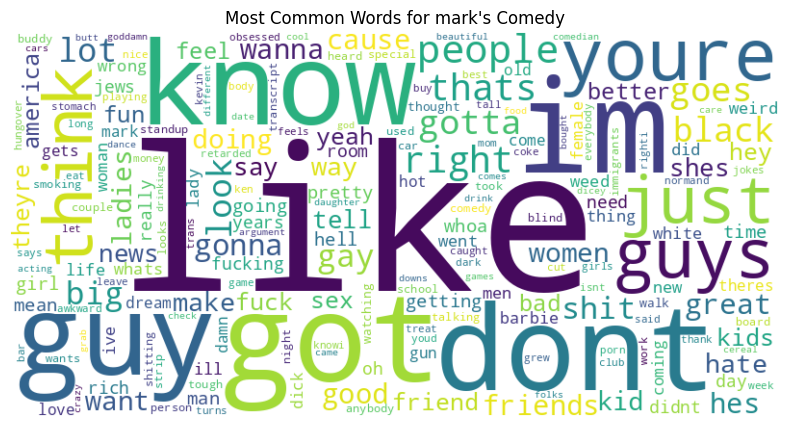

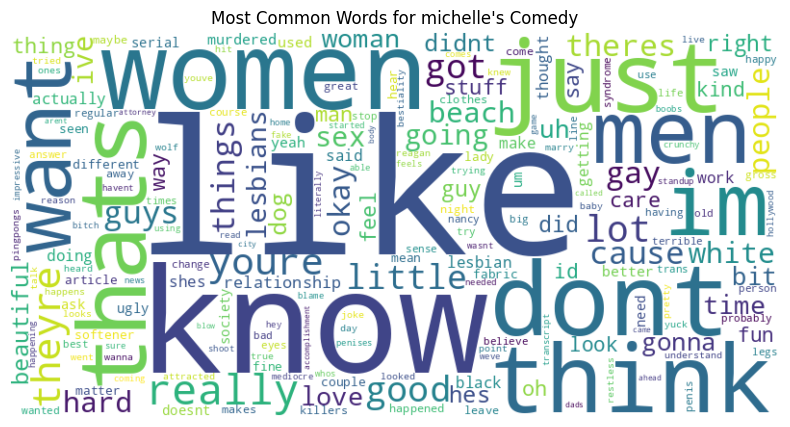

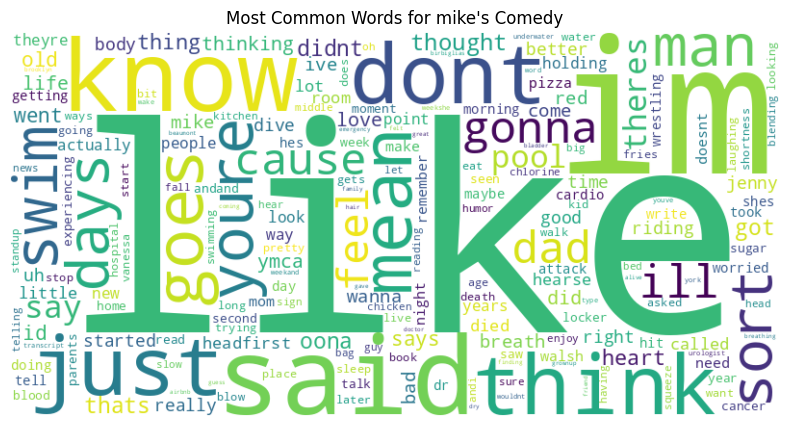

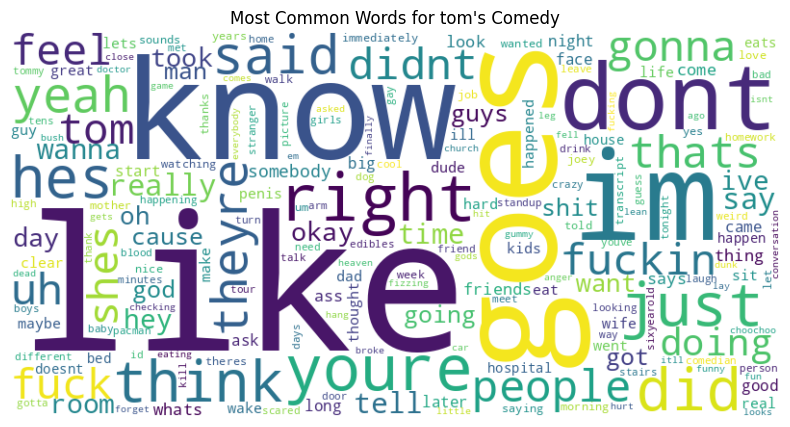

In [32]:
# task 1
import pickle
from collections import Counter,defaultdict
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk import FreqDist
from nltk.tokenize import word_tokenize
import nltk
from nltk.corpus import stopwords
import string
#from profanity_check import predict
nltk.download('stopwords')

with open('dtm.pkl', 'rb') as file:
    comedian_data = pickle.load(file)
comedian_names = comedian_data.index
comedian_word_counts = comedian_data.iloc[:, :]

comedian_durations = {'david': 60, 'lewis': 45, 'george': 55, 'mike': 40, 'gary': 50, 'beth': 60, 'michelle': 45, 'mark': 50, 'jared': 30, 'tom': 55}
comedian_data['total_words'] = 0
comedian_data['run_times'] = 0
comedian_data['words_per_minute'] = 0.0

for comedian_name in comedian_names:
    word_counts = comedian_word_counts.loc[comedian_name, :]

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Most Common Words for {comedian_name}\'s Comedy')
    plt.show()


In [34]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Task 2
for comedian_name, comedian_words in zip(comedian_names, comedian_word_counts.values):
    all_text = ' '.join([word * int(count) for word, count in zip(comedian_word_counts.columns, comedian_words)]).lower()
    words = word_tokenize(all_text)
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word.lower() not in stop_words]

    total_words = len(filtered_words)

    if comedian_name.lower() in comedian_durations:
        duration = comedian_durations[comedian_name.lower()]
        words_per_minute = total_words / duration
    else:
        words_per_minute = 0.0

    comedian_data.at[comedian_name, 'total_words'] = total_words
    comedian_data.at[comedian_name, 'run_times'] = duration
    comedian_data.at[comedian_name, 'words_per_minute'] = words_per_minute

print(comedian_data[['total_words', 'run_times', 'words_per_minute']])


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


          total_words  run_times  words_per_minute
beth             1482         60         24.700000
david            2073         60         34.550000
gary             1498         50         29.960000
george           1929         55         35.072727
jared            1703         30         56.766667
lewis            1228         45         27.288889
mark             2073         50         41.460000
michelle         1331         45         29.577778
mike             2425         40         60.625000
tom              1209         55         21.981818


Top 10 most common words and their counts:
adulthood: 10
comment: 10
cynicism: 10
davidson: 10
davidsons: 10
dylan: 10
fields: 10
fonzarellifonzarelli: 10
herenameemailwebsite: 10
honesty: 10


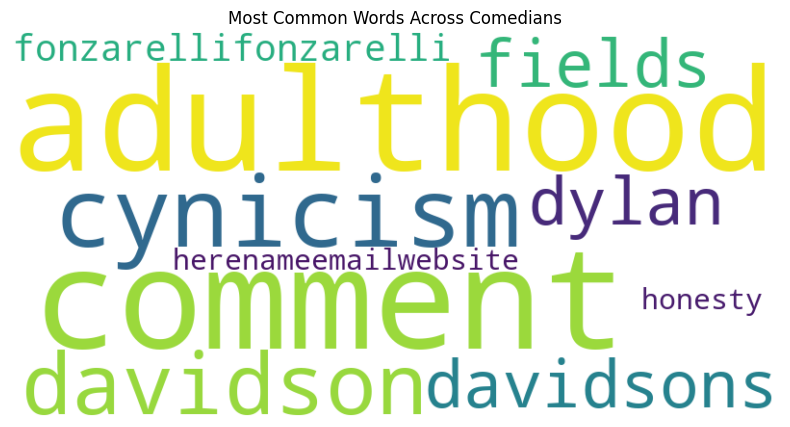

In [35]:
all_text = ' '.join([' '.join([str(word) * int(count) for word, count in zip(comedian_word_counts.columns, comedian_words)]) for comedian_words in comedian_word_counts.values]).lower()
words = word_tokenize(all_text)

stop_words = set(stopwords.words('english'))

filtered_words = [word for word in words if word.lower() not in stop_words]

top_words_count = 10
most_common_words = Counter(filtered_words).most_common(top_words_count)

print(f"Top {top_words_count} most common words and their counts:")

for word, count in most_common_words:
    print(f"{word}: {count}")
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(most_common_words))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words Across Comedians')
plt.show()

**NOTE:** At this point, we could go on and create word clouds. However, by looking at these top words, you can see that some of them have very little meaning and could be added to a stop words list, so let's do just that.



#### Find  and print the top 30 words said by each comedian


In [36]:
comedian_data = pd.DataFrame(comedian_data)
comedian_names = comedian_data.index
comedian_word_counts = comedian_data.iloc[:, :]
def get_top_words(comedian_words, top_count=30):
    all_text = ' '.join([word * int(comedian_words[word]) for word in comedian_word_counts.columns]).lower()
    words = word_tokenize(all_text)
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word.lower() not in stop_words]
    top_words = Counter(filtered_words).most_common(top_count)

    return top_words
for comedian_name in comedian_names:
    comedian_words = comedian_word_counts.loc[comedian_name, :]
    top_words = get_top_words(comedian_words)

    print(f"\nTop 30 words for {comedian_name}:")
    for word, count in top_words:
        print(f"{word}")



Top 30 words for beth:
abdominal
ableableable
abortionabortion
absolutelyabsolutely
absurditiesabsurdities
act
action
actions
actor
actuallyactuallyactuallyactuallyactuallyactuallyactuallyactuallyactuallyactuallyactuallyactually
add
addressaddress
adulthood
advantage
aforementioned
age
agesages
agingagingaging
ago
agree
airport
aislesaisles
alan
alans
alcohol
alienate
align
allfemale
allowed
ambulance

Top 30 words for david:
abolitionist
absolutely
absurdities
abut
acai
accentaccent
acceptable
accumulation
accurate
actionactionaction
actual
actuallyactuallyactuallyactuallyactuallyactuallyactuallyactuallyactuallyactuallyactuallyactuallyactuallyactuallyactuallyactuallyactually
addaddaddadd
added
adderall
addingadding
addition
address
addresses
adjust
adopts
adulthood
advantageadvantage
advice
affectedaffected
affluent
afraid
africanafrican
afuera
age

Top 30 words for gary:
aaaa
abide
able
abracadabraso
absorb
absurdities
according
accountingaccounting
acknowledged
acquitted
actually
a

#### By looking at these top words, you can see that some of them have very little meaning and could be added to a stop words list, so let's do just that. Look at the most common top words and add them to the stop word list.



In [55]:
def add_stop_words(comedian_words, top_count=30):
    all_text = ' '.join([word * int(comedian_words[word]) for word in comedian_word_counts.columns]).lower()

    words = word_tokenize(all_text)

    stop_words = set(stopwords.words('english'))

    top_words = Counter(words).most_common(top_count)

    stop_words.update([word for word, _ in top_words])

    return top_words

stop_words = set(stopwords.words('english'))
for comedian_name in comedian_names:
    comedian_words = comedian_word_counts.loc[comedian_name, :]
    top_words = add_stop_words(comedian_words)

print("\nUpdated stop words list:")
print(stop_words)


Updated stop words list:
{'s', 'be', "that'll", 'the', 'then', 'very', "you're", 'wasn', 'shouldn', 'itself', 'have', "shouldn't", 'myself', "shan't", 'themselves', 'each', "wasn't", 'while', 'doesn', "won't", 'down', 'against', 'am', 'ourselves', 'their', 'been', 't', 'below', 'any', 'no', "she's", 'we', "mustn't", 'before', 'if', 'there', 'her', 'as', "haven't", 'hers', 'all', 'most', 'its', 'under', "weren't", 'through', 'will', 'having', 'above', 'now', 'what', 'own', 'just', 'yours', 'mightn', 'and', 'where', 'at', "wouldn't", 'it', "don't", 'ours', 'isn', 'is', 'or', 'during', 'out', 'when', 'shan', 'theirs', 'himself', 'she', 'with', 'an', 'can', 'm', 'does', 'over', 'too', 'you', 'in', 'don', "didn't", 'herself', 'your', 'such', 'had', 'because', 're', 'that', 'into', 'on', 'being', 'by', 'which', 'ma', 'aren', 'should', 'couldn', 'his', "aren't", 'how', 'after', 'same', "should've", 'again', 'until', 'this', 'more', 'has', 'll', 'won', 'other', 'yourself', 'he', "hasn't", 'ne

#### Let's aggregate this list and identify the most common words along with how many routines they occur in


In [56]:
# Let's aggregate this list and identify the most common words along with how many routines they occur in
Counter(words).most_common()

[('adulthood', 10),
 ('comment', 10),
 ('cynicism', 10),
 ('davidson', 10),
 ('davidsons', 10),
 ('dylan', 10),
 ('fields', 10),
 ('fonzarellifonzarelli', 10),
 ('herenameemailwebsite', 10),
 ('honesty', 10),
 ('irregardlessirregardless', 10),
 ('marked', 10),
 ('moran', 10),
 ('morans', 10),
 ('parenting', 10),
 ('petepete', 10),
 ('reflect', 10),
 ('replyyour', 10),
 ('required', 10),
 ('selfdeprecation', 10),
 ('sharp', 10),
 ('tackling', 10),
 ('transcripts', 10),
 ('turboturbo', 10),
 ('yer', 10),
 ('article', 9),
 ('blends', 9),
 ('changing', 9),
 ('email', 9),
 ('explores', 9),
 ('flaws', 9),
 ('humorous', 9),
 ('irishlatino', 9),
 ('jamesjames', 9),
 ('navigates', 9),
 ('published', 9),
 ('technology', 9),
 ('transcripttranscripttranscripttranscripttranscript', 9),
 ('whimsy', 9),
 ('wit', 9),
 ('address', 9),
 ('current', 8),
 ('existence', 8),
 ('fame', 8),
 ('identity', 8),
 ('immigration', 8),
 ('kevinkevin', 8),
 ('nihillnihill', 8),
 ('offers', 8),
 ('parallels', 8),
 ('a

#### If more than half of the comedians have it as a top word, exclude it from the list


In [38]:
# If more than half of the comedians have it as a top word, exclude it from the list
add_stop_words = [word for word, count in Counter(words).most_common() if count > 6]
add_stop_words

['adulthood',
 'comment',
 'cynicism',
 'davidson',
 'davidsons',
 'dylan',
 'fields',
 'fonzarellifonzarelli',
 'herenameemailwebsite',
 'honesty',
 'irregardlessirregardless',
 'marked',
 'moran',
 'morans',
 'parenting',
 'petepete',
 'reflect',
 'replyyour',
 'required',
 'selfdeprecation',
 'sharp',
 'tackling',
 'transcripts',
 'turboturbo',
 'yer',
 'article',
 'blends',
 'changing',
 'email',
 'explores',
 'flaws',
 'humorous',
 'irishlatino',
 'jamesjames',
 'navigates',
 'published',
 'technology',
 'transcripttranscripttranscripttranscripttranscript',
 'whimsy',
 'wit',
 'address',
 'current',
 'existence',
 'fame',
 'identity',
 'immigration',
 'kevinkevin',
 'nihillnihill',
 'offers',
 'parallels',
 'absurdities',
 'field',
 'rapidly',
 'anecdotes',
 'blendingblending',
 'cancel',
 'cultural',
 'daviddavid',
 'difference',
 'lifes',
 'meet',
 'series',
 'today',
 'appreciation',
 'irish',
 'taken']

In [57]:
import pickle
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

with open('data_clean.pkl', 'rb') as file:
    cleaned_data = pickle.load(file)
print("Column Names:", cleaned_data.columns)

def custom_analyzer(text):
    words = word_tokenize(text)
    return [word for word in words if word.lower() not in stop_words]

vectorizer = CountVectorizer(analyzer=custom_analyzer)
dtm = vectorizer.fit_transform(cleaned_data['transcript'])

with open('document_term_matrix.pkl', 'wb') as file:
    pickle.dump(dtm, file)

with open('vectorizer.pkl', 'wb') as file:
    pickle.dump(vectorizer, file)


Column Names: Index(['transcript'], dtype='object')


### Assignment 2:
#### Find the number of unique words that each comedian uses.

In [58]:
import pickle
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

with open('dtm.pkl', 'rb') as file:
    comedian_data = pickle.load(file)
comedian_names = comedian_data.index
comedian_word_counts = comedian_data.iloc[:, 1:]

for comedian_name, comedian_words in zip(comedian_names, comedian_word_counts.values):
    all_text = ' '.join([word * count for word, count in zip(comedian_word_counts.columns, comedian_words)]).lower()

    words = word_tokenize(all_text)

    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word.lower() not in stop_words]

    unique_words = set(filtered_words)
    num_unique_words = len(unique_words)

    print(f"{comedian_name} uses {num_unique_words} unique words.")


beth uses 1479 unique words.
david uses 2070 unique words.
gary uses 1494 unique words.
george uses 1926 unique words.
jared uses 1699 unique words.
lewis uses 1224 unique words.
mark uses 2070 unique words.
michelle uses 1328 unique words.
mike uses 2421 unique words.
tom uses 1206 unique words.


### Calculate the words per minute of each comedian


In [60]:
# Calculate the words per minute of each comedian

print("Calculate the words per minute of each comedian")
comedian_durations = {'david': 60, 'lewis': 45, 'george': 55, 'mike': 40, 'gary': 50, 'beth': 60, 'michelle': 45, 'mark': 50, 'jared': 30, 'tom': 55}

for comedian_name, comedian_words in zip(comedian_names, comedian_word_counts.values):
    all_text = ' '.join([word * count for word, count in zip(comedian_word_counts.columns, comedian_words)]).lower()

    # Tokenize the text
    words = word_tokenize(all_text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word.lower() not in stop_words]

    # Calculate the total number of words
    total_words = len(filtered_words)

    # Calculate words per minute
    # if comedian_name.lower() in comedian_durations:
    #     duration = comedian_durations[comedian_name.lower()]
    #     wpm = total_words / duration
    #     print(f"{comedian_name} has {wpm:.2f} words per minute.")
    # else:
    #     print(f"{comedian_name} has no duration information.")




# Find the total number of words that a comedian uses
print()
print()
print("Find the total number of words that a comedian uses")
total_words_per_comedian = comedian_word_counts.sum(axis=1)

result_df = pd.DataFrame({ 'Total Words': total_words_per_comedian})
# print(result_df)



# add some columns to our dataframe: 'total_words', 'run_times' and 'words_per_minute'
print()
print()
print()
print("add some columns to our dataframe: 'total_words', 'run_times' and 'words_per_minute'")
# Create new columns
comedian_data['total_words'] = 0
comedian_data['run_times'] = 0
comedian_data['words_per_minute'] = 0.0
for comedian_name, comedian_words in zip(comedian_names, comedian_word_counts.values):
    # Combine all text data into a single string
    all_text = ' '.join([word * count for word, count in zip(comedian_word_counts.columns, comedian_words)]).lower()

    # Tokenize the text
    words = word_tokenize(all_text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word.lower() not in stop_words]

    # Calculate the total number of words
    total_words = len(filtered_words)

    # Calculate words per minute
    if comedian_name.lower() in comedian_durations:
        duration = comedian_durations[comedian_name.lower()]
        words_per_minute = total_words / duration
    else:
        words_per_minute = 0.0

    # Update DataFrame with new values
    comedian_data.at[comedian_name, 'total_words'] = total_words
    comedian_data.at[comedian_name, 'run_times'] = duration
    comedian_data.at[comedian_name, 'words_per_minute'] = words_per_minute

# Display the updated DataFrame
# print(comedian_data)

# Sort the dataframe by words per minute to see who talks the slowest and fastest
print()
print()
print()
print("Sort the dataframe by words per minute to see who talks the slowest and fastest")
comedian_data_sorted = comedian_data.sort_values(by='words_per_minute', ascending=False)
print(comedian_data_sorted)

Calculate the words per minute of each comedian


Find the total number of words that a comedian uses



add some columns to our dataframe: 'total_words', 'run_times' and 'words_per_minute'



Sort the dataframe by words per minute to see who talks the slowest and fastest
          aa  aback  abacus  abdominal  abide  abilitiesand  ability  able  \
mike       1      0       1          0      0             0        1     1   
jared      1      0       0          0      0             0        0     0   
mark       0      0       0          0      0             0        0     1   
george     0      0       0          0      0             0        1     3   
david      0      0       0          0      0             0        0     0   
gary       2      0       0          0      1             0        0     1   
michelle   0      1       0          0      0             1        1     5   
lewis      0      0       0          0      0             0        0     1   
beth       0      0      

### plot our findings


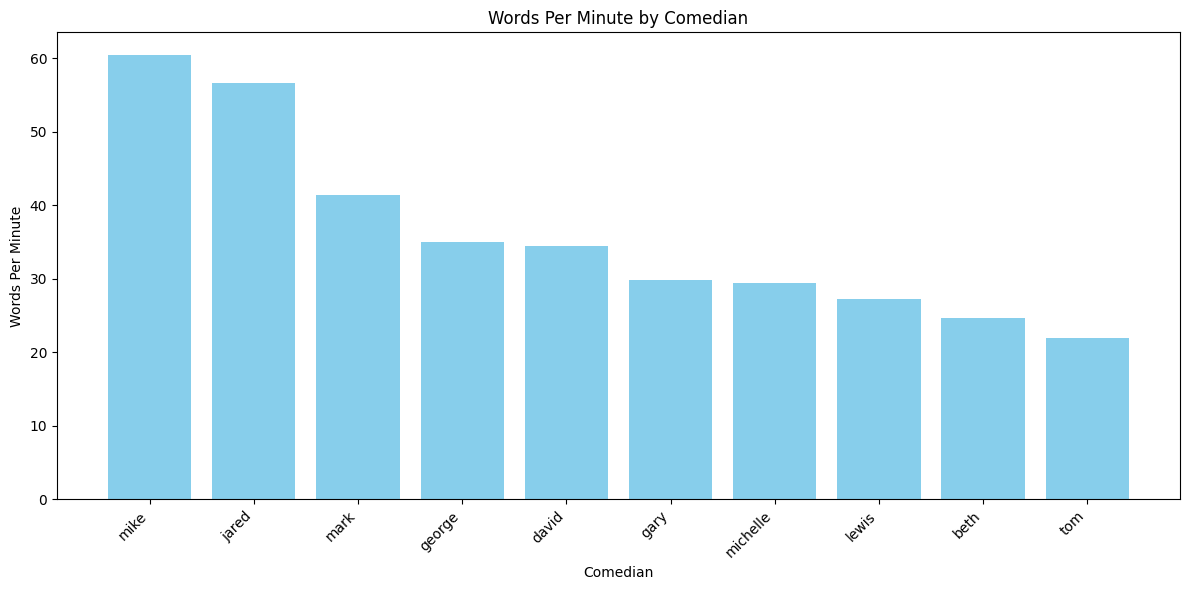

In [61]:
# plot our findings
plt.figure(figsize=(12, 6))
plt.bar(comedian_data_sorted.index, comedian_data_sorted['words_per_minute'], color='skyblue')
plt.title('Words Per Minute by Comedian')
plt.xlabel('Comedian')
plt.ylabel('Words Per Minute')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


#### Write your findings. For example:
* **Talking Speed**
  * Mike Birbiglia has the highest words per minute at approximately 60, while George Carlin has the lowest at around 20.
 * Most comedians speak at over 40 words per minute, with some variability.
   


### Assignment 3:
#### Check the profanity by analysing the common bad words, like `fucking`, `fuck`, `shit etc.


Total Profanity Occurrences:
beth          6
david         3
gary          2
george       27
jared        74
lewis       149
mark         43
michelle     10
mike          1
tom          37
Name: total_profanity, dtype: int64


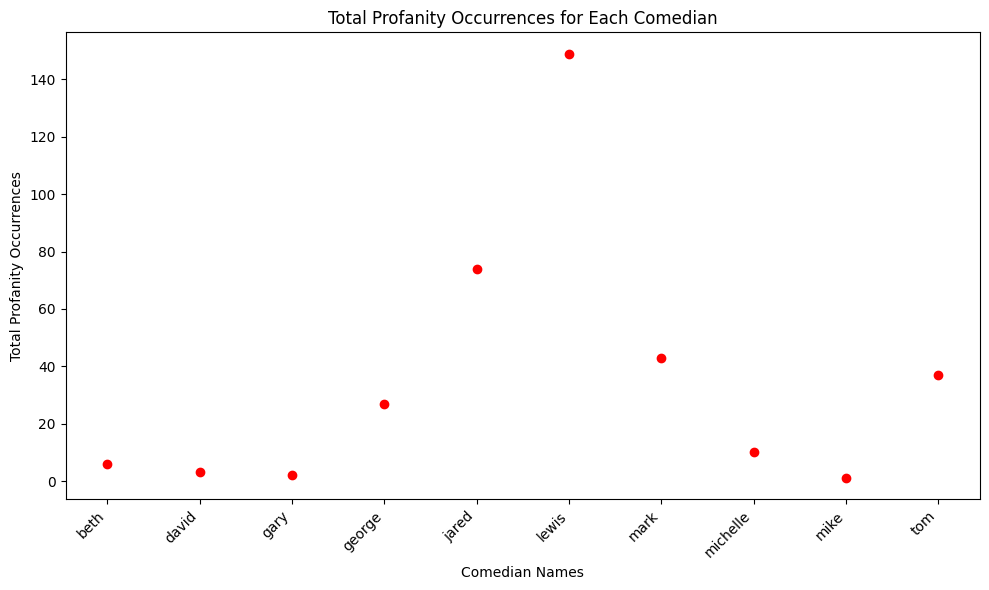

In [62]:
with open('dtm.pkl', 'rb') as file:
    comedian_data = pickle.load(file)
comedian_names = comedian_data.index
comedian_word_counts = comedian_data.iloc[:, :]
# Define profane words
profane_words = ['fuck', 'fucking', 'shit', 'damn', 'bitch', 'ass']

# Calculate total profanity occurrences for each comedian
comedian_data['total_profanity'] = comedian_data[profane_words].sum(axis=1)

# Display the total profanity occurrences
print("\nTotal Profanity Occurrences:")
print(comedian_data['total_profanity'])

# Plot a scatter plot of total profanity occurrences
plt.figure(figsize=(10, 6))
plt.scatter(comedian_data.index, comedian_data['total_profanity'], color='red')
plt.title('Total Profanity Occurrences for Each Comedian')
plt.xlabel('Comedian Names')
plt.ylabel('Total Profanity Occurrences')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Write your findings.
* **Comedian with the most profanities** - Lewis Black has the highest number of profanity occurrences, with 149.
* **Comedian with the least profanities** - Mike Birbiglia has the lowest number of profanity occurrences, with only 1.Co
* **Comedians with moderate profanity use** - B George Carlin, Jared Fried, Mark Normand all have moderate profanity occurrences.

### Assignment 4:(optional)
What other word counts do you think would be interesting to compare instead of the f-word and s-word? Create a scatter plot comparing them.

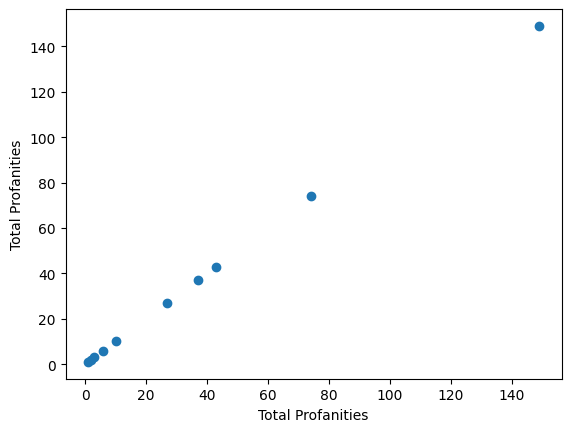

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

data = {
    "comedian": ["Beth Stelling", "David Nihill", "Gary Gulman", "George Carlin", "Jared Fried", "Lewis Black", "Mark Normand", "Michelle Wolf", "Mike Birbiglia", "Tom Segura"],
    "total_profanities": [6, 3, 2, 27, 74, 149, 43, 10, 1, 37],
}

df = pd.DataFrame(data)

plt.scatter(df["total_profanities"], df["total_profanities"])
plt.xlabel("Total Profanities")
plt.ylabel("Total Profanities")

# Commenting out the text labels
# for i, row in df.iterrows():
#     plt.text(row["total_profanities"], row["total_profanities"], row["comedian"], ha="center", va="center")

plt.show()
